In [1]:
# Auto_encoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import keras
from keras import layers

# mnist 데이터 불러오기

from keras.datasets import mnist

In [2]:
(x_train,_), (x_test,_)= mnist.load_data()
# 이미지만 사용. 

# 0과 1 사이로 정규화
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [3]:
print(len(x_train))
print(len(x_test))

60000
10000


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train.shape[1:]

(28, 28)

In [6]:
np.prod(x_train.shape[1:]) # 내적 

784

In [7]:
x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [9]:
print(x_train.shape)
print(x_test.shape) 
# 차원 축소 일어났다.

(60000, 784)
(10000, 784)


In [10]:
# auto_encoder 모델 생성

# encoding 되는 차원의 수
encoding_dim = 32

# input layer
input_img = keras.Input(shape=(784,))

# hidden layer (784 dimension >> 32 dimsion으롤 줄이겠다.)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# output layer (32 dimension >> 784 dimension)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# autoencoder 모델
autoencoder = keras.Model(input_img,decoded)

In [11]:
# auto_encoder 학습 

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
 
# 적합(훈련용 데이터 활용)
autoencoder.fit(x_train, x_train, 
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test)) 

Epoch 1/20
235/235 [==============================] - 1s 2ms/step - loss: 0.2783 - val_loss: 0.1897
Epoch 2/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1699 - val_loss: 0.1529
Epoch 3/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1437 - val_loss: 0.1333
Epoch 4/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1282 - val_loss: 0.1209
Epoch 5/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.1124
Epoch 6/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1106 - val_loss: 0.1064
Epoch 7/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.1022
Epoch 8/20
235/235 [==============================] - 0s 2ms/step - loss: 0.1019 - val_loss: 0.0993
Epoch 9/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/20
235/235 [==============================] - 0s 2ms/step - loss: 0.0976 - val_loss: 0.0956

In [12]:
# 학습결과 확인 
decoded_imgs = autoencoder.predict(x_test) 

313/313 [==============================] - 0s 561us/step


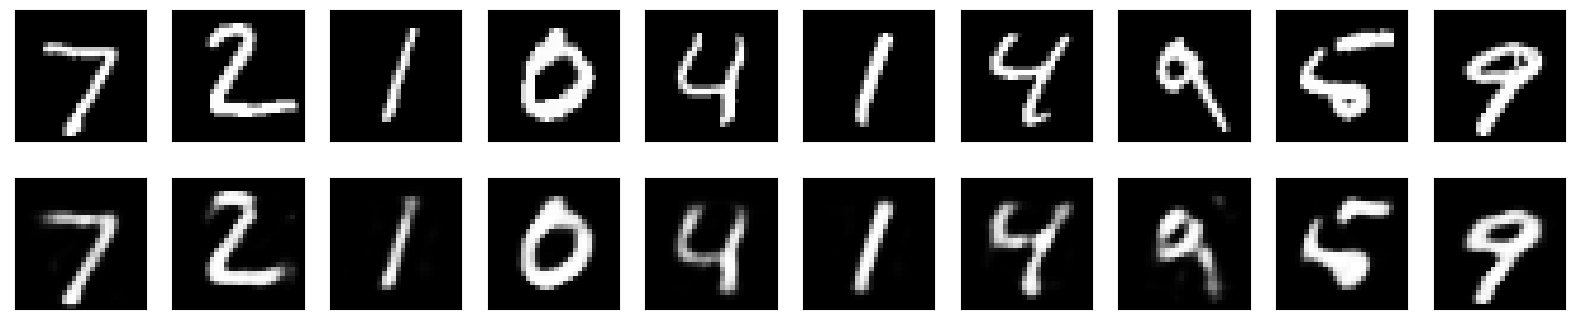

In [13]:
n = 10 # 보여주고 싶은 그림 수 

plt.figure(figsize=(20,4))

for i in range(n): 
    # 원래 이미지
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # 복원된 이미지
    ax = plt.subplot(2,n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray() 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 
    
plt.show()